**Brain tumor detection**

---



Necessary libraries

In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Load YOLOv8

In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.1MB/s]


Import dataset

In [4]:
#!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download('pkdarabi/medical-image-dataset-brain-tumor-detection')

100%|██████████| 113M/113M [00:01<00:00, 68.1MB/s] 

Extracting files...


Data preprocessing

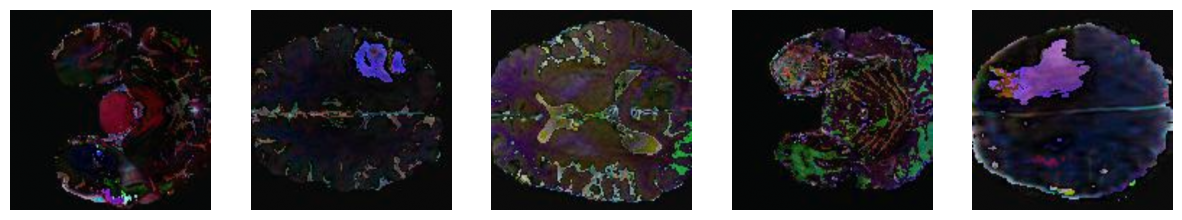

In [5]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# Paths for your dataset (change according to your setup)
image_path = path + "/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/"
label_path = path + "/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/"

# Preprocessing Parameters
img_size = (416, 416)  # Standard YOLOv8 size

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image_resized = cv2.resize(image, img_size)
    # Normalize pixel values to [0, 1]
    image_normalized = image_resized / 255.0
    return image_normalized

# Display few samples after preprocessing
def visualize_preprocessed_images(image_paths, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:n]):
        img = cv2.imread(img_path)
        if img is None:
          print(f"Warning: Unable to read image from {img_path}")
          continue  # Skip to the next image if loading fails

        img = preprocess_image(img)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Get all image paths
image_paths = glob(os.path.join(image_path, '*.jpg'))  # Modify if images are in other formats

# Apply preprocessing and visualize
visualize_preprocessed_images(image_paths)

Model training

In [6]:
!pip install wandb

In [8]:
import wandb
wandb.init(project="brain-tumor-detection", name="yolov8n-training")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [10]:
yaml_file_path = path + '/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml'

# Train the model
results = T_Model.train(
    data=yaml_file_path,  # Path to the dataset YAML file
    epochs=50,            # Number of training epochs
    patience=20,          # Early stopping patience
    batch=-1,             # Automatically determine batch size
    optimizer='auto',     # Use default optimizer
    project='Brain_Tumor_Detection',  # Wandb project directory
    name='yolov8n_tumor'  # Run name
)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml, epochs=50, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Brain_Tumor_Detection, name=yolov8n_tumor, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels.cache... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.14G reserved, 0.07G allocated, 14.54G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.201         33.78         19.48        (1, 3, 640, 640)                    list
     3011433       16.39         0.308         33.46         20.44        (2, 3, 640, 640)                    list
     3011433       32.79         0.547         27.04         20.55        (4, 3, 640, 640)                    list
     3011433       65.57         0.988         30.22         34.09        (8, 3, 640, 640)                    list
     3011433       131.1         1.913         52.49         59.57       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 75 for CUDA:0 8.85G/14.75G (60%) ✅


train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels.cache... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:03<00:00, 555.90it/s]

val: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels.cache


Plotting labels to Brain_Tumor_Detection/yolov8n_tumor/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005859375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Brain_Tumor_Detection/yolov8n_tumor
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.55G      1.796      2.979      1.898        110        640: 100%|██████████| 93/93 [02:13<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]


                   all       1980       4380        0.4      0.276      0.254      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       9.5G      1.718      2.249      1.826         92        640: 100%|██████████| 93/93 [02:10<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.58s/it]


                   all       1980       4380      0.216      0.188      0.125     0.0476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.52G      1.746      2.065      1.843        126        640: 100%|██████████| 93/93 [02:09<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.71s/it]


                   all       1980       4380      0.353      0.277      0.237     0.0915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.53G      1.718       1.93      1.822        105        640: 100%|██████████| 93/93 [02:12<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.43s/it]


                   all       1980       4380      0.366      0.305      0.269      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.55G      1.691      1.827      1.806        134        640: 100%|██████████| 93/93 [02:11<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.446      0.433      0.403      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.53G      1.662      1.725      1.775         98        640: 100%|██████████| 93/93 [02:14<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

                   all       1980       4380       0.61      0.446      0.471      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.53G       1.64       1.66      1.775        110        640: 100%|██████████| 93/93 [02:12<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


                   all       1980       4380      0.638      0.455      0.512      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.52G      1.615      1.584      1.753        117        640: 100%|██████████| 93/93 [02:17<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.52s/it]


                   all       1980       4380      0.624      0.426      0.467      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       9.5G      1.607       1.58       1.74        119        640: 100%|██████████| 93/93 [02:14<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.43s/it]


                   all       1980       4380      0.708      0.509      0.566      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.53G      1.585      1.516      1.721         85        640: 100%|██████████| 93/93 [02:11<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.36s/it]


                   all       1980       4380      0.724      0.543      0.593      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.51G      1.565      1.481      1.692        114        640: 100%|██████████| 93/93 [02:13<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.712      0.518      0.569      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.51G      1.572      1.459      1.703        106        640: 100%|██████████| 93/93 [02:11<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.36s/it]


                   all       1980       4380      0.727      0.529      0.589      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.54G      1.547      1.407       1.68        114        640: 100%|██████████| 93/93 [02:14<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

                   all       1980       4380      0.732      0.553      0.615      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.53G      1.538      1.398      1.673        147        640: 100%|██████████| 93/93 [02:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.41s/it]


                   all       1980       4380      0.768      0.574      0.641      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.52G      1.516      1.347      1.656         93        640: 100%|██████████| 93/93 [02:12<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


                   all       1980       4380      0.735      0.567       0.63      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.53G      1.509      1.344      1.659        112        640: 100%|██████████| 93/93 [02:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.45s/it]


                   all       1980       4380      0.746      0.572      0.632      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.51G      1.504      1.342      1.648        112        640: 100%|██████████| 93/93 [02:13<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


                   all       1980       4380      0.767      0.584      0.644      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.51G      1.487      1.301      1.628        103        640: 100%|██████████| 93/93 [02:07<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.71s/it]


                   all       1980       4380      0.784      0.588      0.657      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.53G      1.472      1.272       1.61         96        640: 100%|██████████| 93/93 [02:08<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


                   all       1980       4380      0.755      0.596       0.66      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.51G      1.462      1.251      1.619        100        640: 100%|██████████| 93/93 [02:08<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.30s/it]


                   all       1980       4380      0.799      0.608      0.676       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.54G      1.442      1.235      1.596        115        640: 100%|██████████| 93/93 [02:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

                   all       1980       4380      0.794      0.598      0.668      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       9.5G       1.44      1.223      1.599        107        640: 100%|██████████| 93/93 [02:08<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

                   all       1980       4380      0.763      0.585       0.65       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.52G      1.426      1.199      1.581         82        640: 100%|██████████| 93/93 [02:09<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

                   all       1980       4380      0.795      0.625      0.691      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.51G      1.412      1.198      1.575        123        640: 100%|██████████| 93/93 [02:12<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.39s/it]


                   all       1980       4380      0.802      0.611      0.686      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.54G        1.4      1.162      1.569        110        640: 100%|██████████| 93/93 [02:15<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.58s/it]


                   all       1980       4380       0.81      0.617      0.691      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.53G      1.392      1.148      1.563        112        640: 100%|██████████| 93/93 [02:15<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

                   all       1980       4380      0.814      0.628      0.697      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.53G      1.376      1.135      1.544        118        640: 100%|██████████| 93/93 [02:17<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

                   all       1980       4380      0.808      0.618      0.694      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.52G       1.37      1.129      1.541        126        640: 100%|██████████| 93/93 [02:14<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

                   all       1980       4380      0.795      0.613      0.695      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       9.5G      1.355      1.112      1.536         81        640: 100%|██████████| 93/93 [02:19<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.51s/it]


                   all       1980       4380       0.81      0.619      0.697      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.53G      1.351       1.11      1.538        137        640: 100%|██████████| 93/93 [02:12<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


                   all       1980       4380      0.824      0.639      0.711      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.53G      1.334      1.095      1.515        127        640: 100%|██████████| 93/93 [02:13<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

                   all       1980       4380      0.829      0.637      0.719      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.49G      1.337      1.078      1.518        129        640: 100%|██████████| 93/93 [02:14<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.45s/it]


                   all       1980       4380      0.838      0.629      0.711       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.52G      1.312      1.053      1.497        127        640: 100%|██████████| 93/93 [02:05<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.44s/it]


                   all       1980       4380      0.818      0.641      0.714      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.52G      1.304      1.051      1.492        147        640: 100%|██████████| 93/93 [02:12<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]


                   all       1980       4380      0.826      0.643      0.723       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.53G      1.308      1.036      1.494        135        640: 100%|██████████| 93/93 [02:07<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.52s/it]


                   all       1980       4380      0.812      0.656      0.722      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.53G      1.296      1.027       1.48        110        640: 100%|██████████| 93/93 [02:17<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.35s/it]


                   all       1980       4380      0.822       0.66      0.733      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.51G      1.285      1.015       1.47        106        640: 100%|██████████| 93/93 [02:20<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.46s/it]

                   all       1980       4380      0.843      0.653      0.736      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.53G      1.265      0.992       1.47        118        640: 100%|██████████| 93/93 [02:18<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]


                   all       1980       4380      0.836      0.654      0.734      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.52G       1.26     0.9922       1.46        104        640: 100%|██████████| 93/93 [02:14<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.46s/it]

                   all       1980       4380       0.83      0.663      0.736      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.49G      1.256     0.9907      1.453        154        640: 100%|██████████| 93/93 [02:25<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


                   all       1980       4380      0.822      0.673      0.744      0.449
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.35G       1.23     0.8924      1.525         74        640: 100%|██████████| 93/93 [02:12<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

                   all       1980       4380      0.828      0.675      0.746      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.35G      1.204     0.8597      1.508         57        640: 100%|██████████| 93/93 [02:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

                   all       1980       4380      0.839      0.681      0.749      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.35G      1.182     0.8435      1.493         72        640: 100%|██████████| 93/93 [01:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

                   all       1980       4380      0.851       0.67      0.751      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.35G      1.182      0.836      1.485         66        640: 100%|██████████| 93/93 [01:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

                   all       1980       4380      0.855      0.673      0.755      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.35G      1.155     0.8137      1.472         68        640: 100%|██████████| 93/93 [01:55<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

                   all       1980       4380      0.837      0.691      0.758      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.35G      1.141     0.8044      1.458         73        640: 100%|██████████| 93/93 [01:56<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]


                   all       1980       4380      0.838      0.692      0.759      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.35G      1.127     0.7897      1.441         64        640: 100%|██████████| 93/93 [01:56<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

                   all       1980       4380      0.849      0.682       0.76      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.35G      1.111      0.778      1.437         61        640: 100%|██████████| 93/93 [01:55<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

                   all       1980       4380      0.839      0.693      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.35G      1.106     0.7715      1.424         67        640: 100%|██████████| 93/93 [02:02<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

                   all       1980       4380      0.828        0.7      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.35G      1.097     0.7659      1.419         68        640: 100%|██████████| 93/93 [02:06<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

                   all       1980       4380      0.845      0.691      0.763      0.479



50 epochs completed in 2.112 hours.
Optimizer stripped from Brain_Tumor_Detection/yolov8n_tumor/weights/last.pt, 6.2MB
Optimizer stripped from Brain_Tumor_Detection/yolov8n_tumor/weights/best.pt, 6.2MB

Validating Brain_Tumor_Detection/yolov8n_tumor/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.63s/it]


                   all       1980       4380      0.845      0.691      0.763      0.479
                label0       1246       1246      0.789      0.605      0.687      0.389
                label1       1944       1944      0.888      0.799      0.857      0.594
                label2       1190       1190      0.857      0.668      0.745      0.455
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to Brain_Tumor_Detection/yolov8n_tumor


Model evaluation

In [22]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Load validation results
T_Model = YOLO("Brain_Tumor_Detection/yolov8n_tumor/weights/best.pt")
metrics = T_Model.val()

# Extract metrics
results_dict = metrics.results_dict  # YOLO metrics dictionary


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels.cache... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:22<00:00,  5.56it/s]


                   all       1980       4380      0.844      0.691      0.763      0.479
                label0       1246       1246      0.788      0.606      0.687      0.389
                label1       1944       1944      0.889      0.799      0.857      0.594
                label2       1190       1190      0.856      0.669      0.745      0.455
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


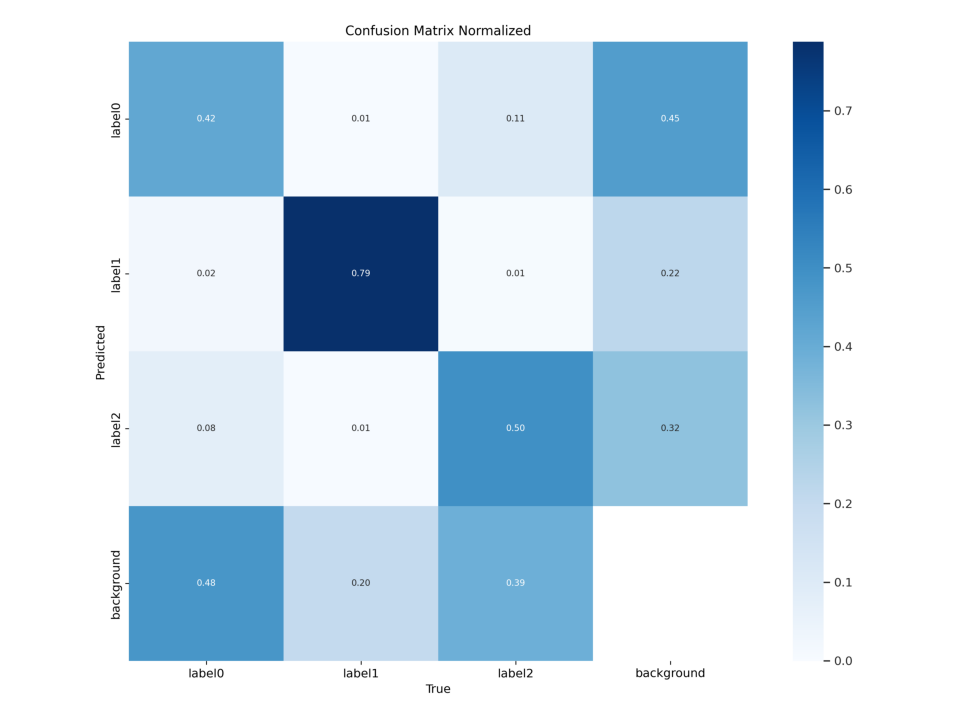

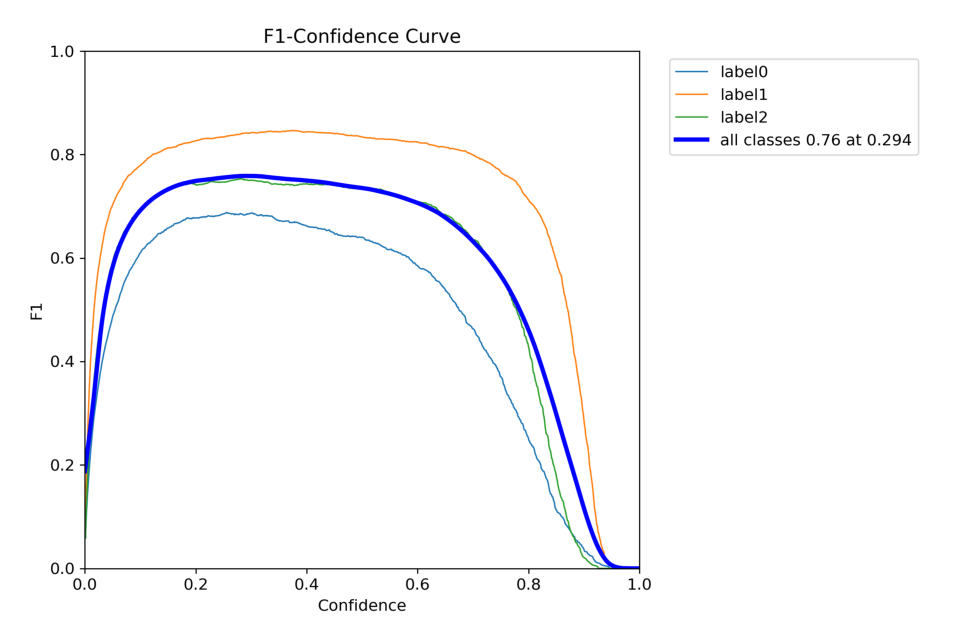

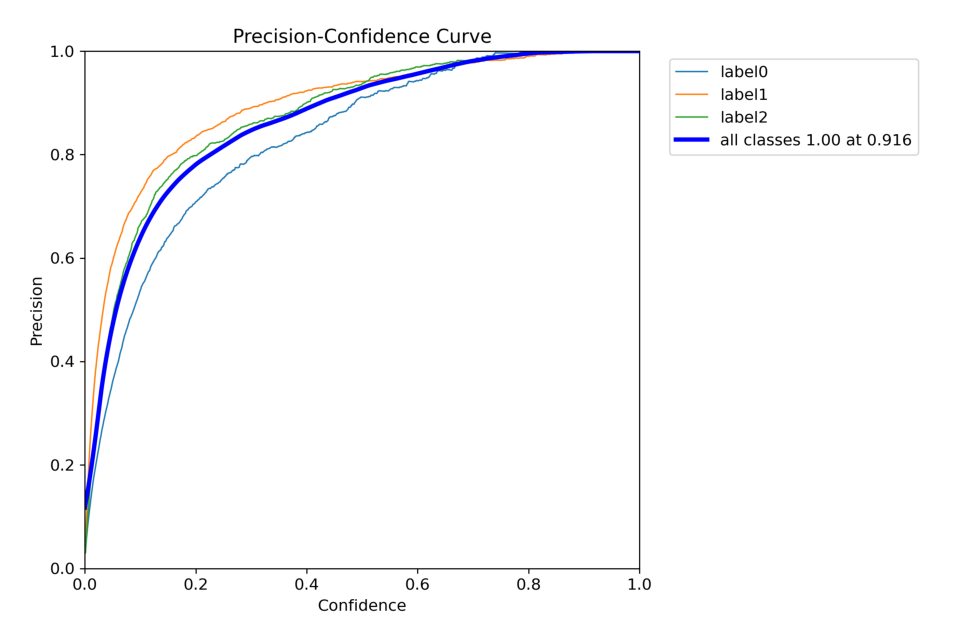

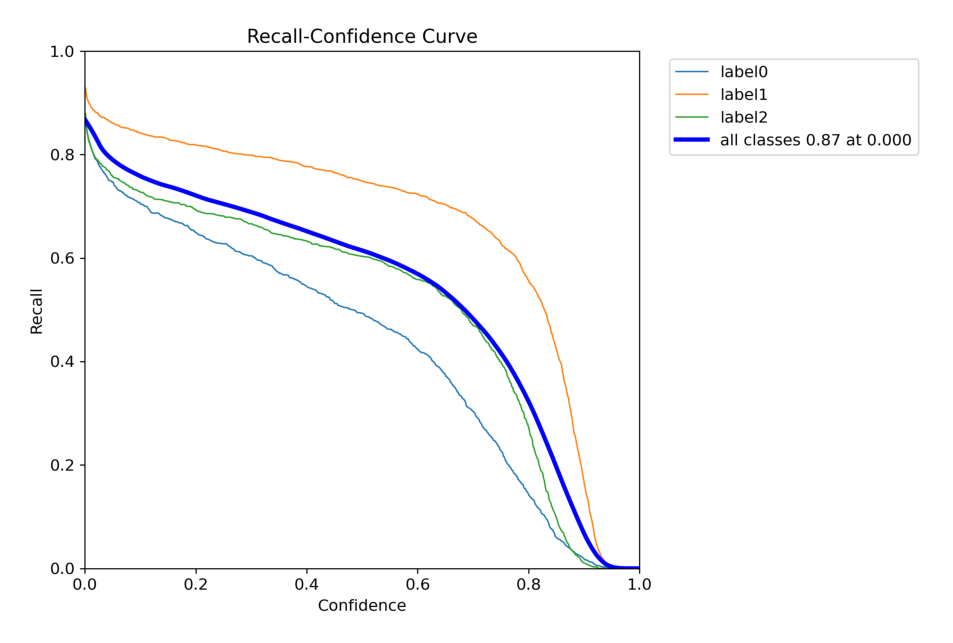

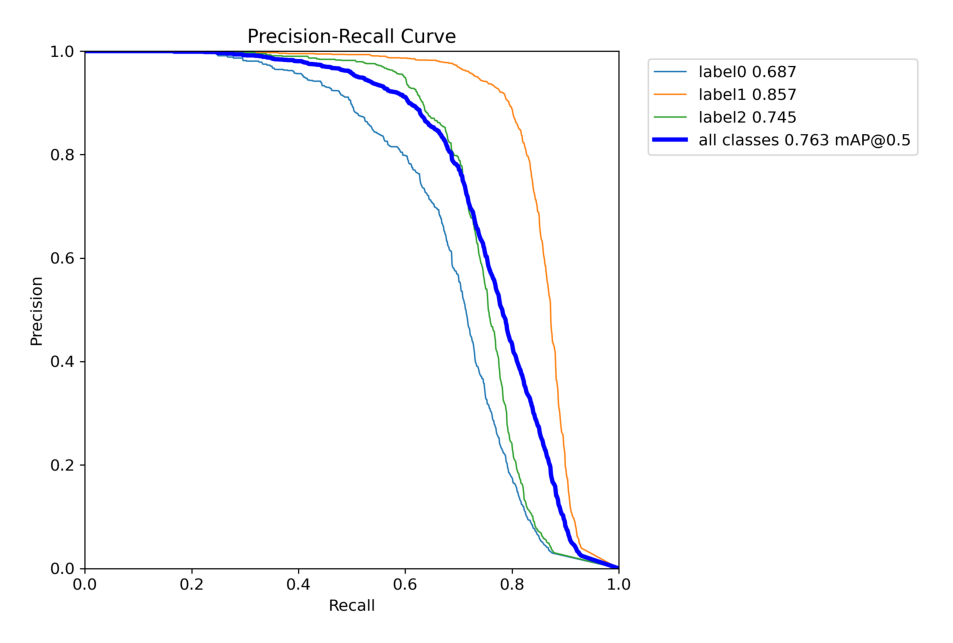

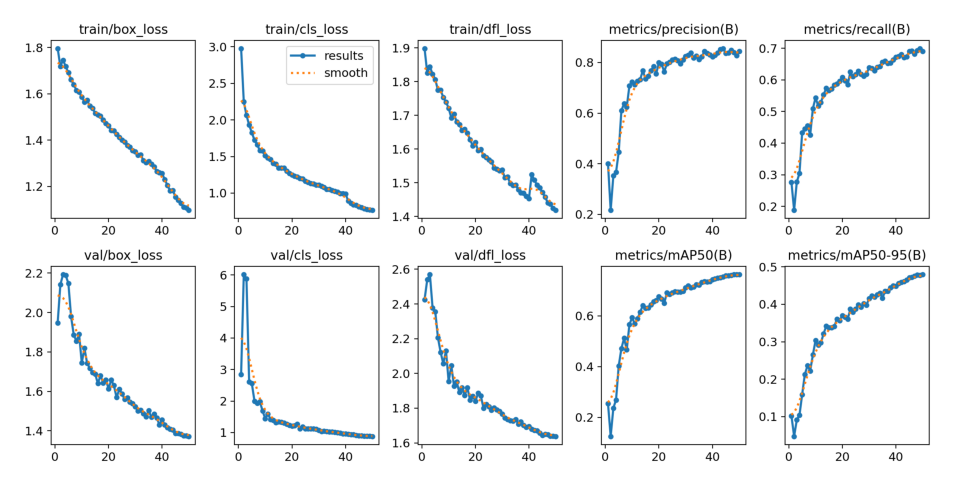

In [24]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/Brain_Tumor_Detection/yolov8n_tumor'

# Display the images
display_images(post_training_files_path, image_files)

Show illustrative example


0: 640x640 2 label1s, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 1 label2, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 1 label2, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label0, 1 label1, 1 label2, 7.6ms
Speed: 2.9ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label1, 14.5ms
Speed: 2.7ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 label0, 1 label1, 1 label2, 10.1ms
Speed: 2.2ms preprocess, 10.1ms i

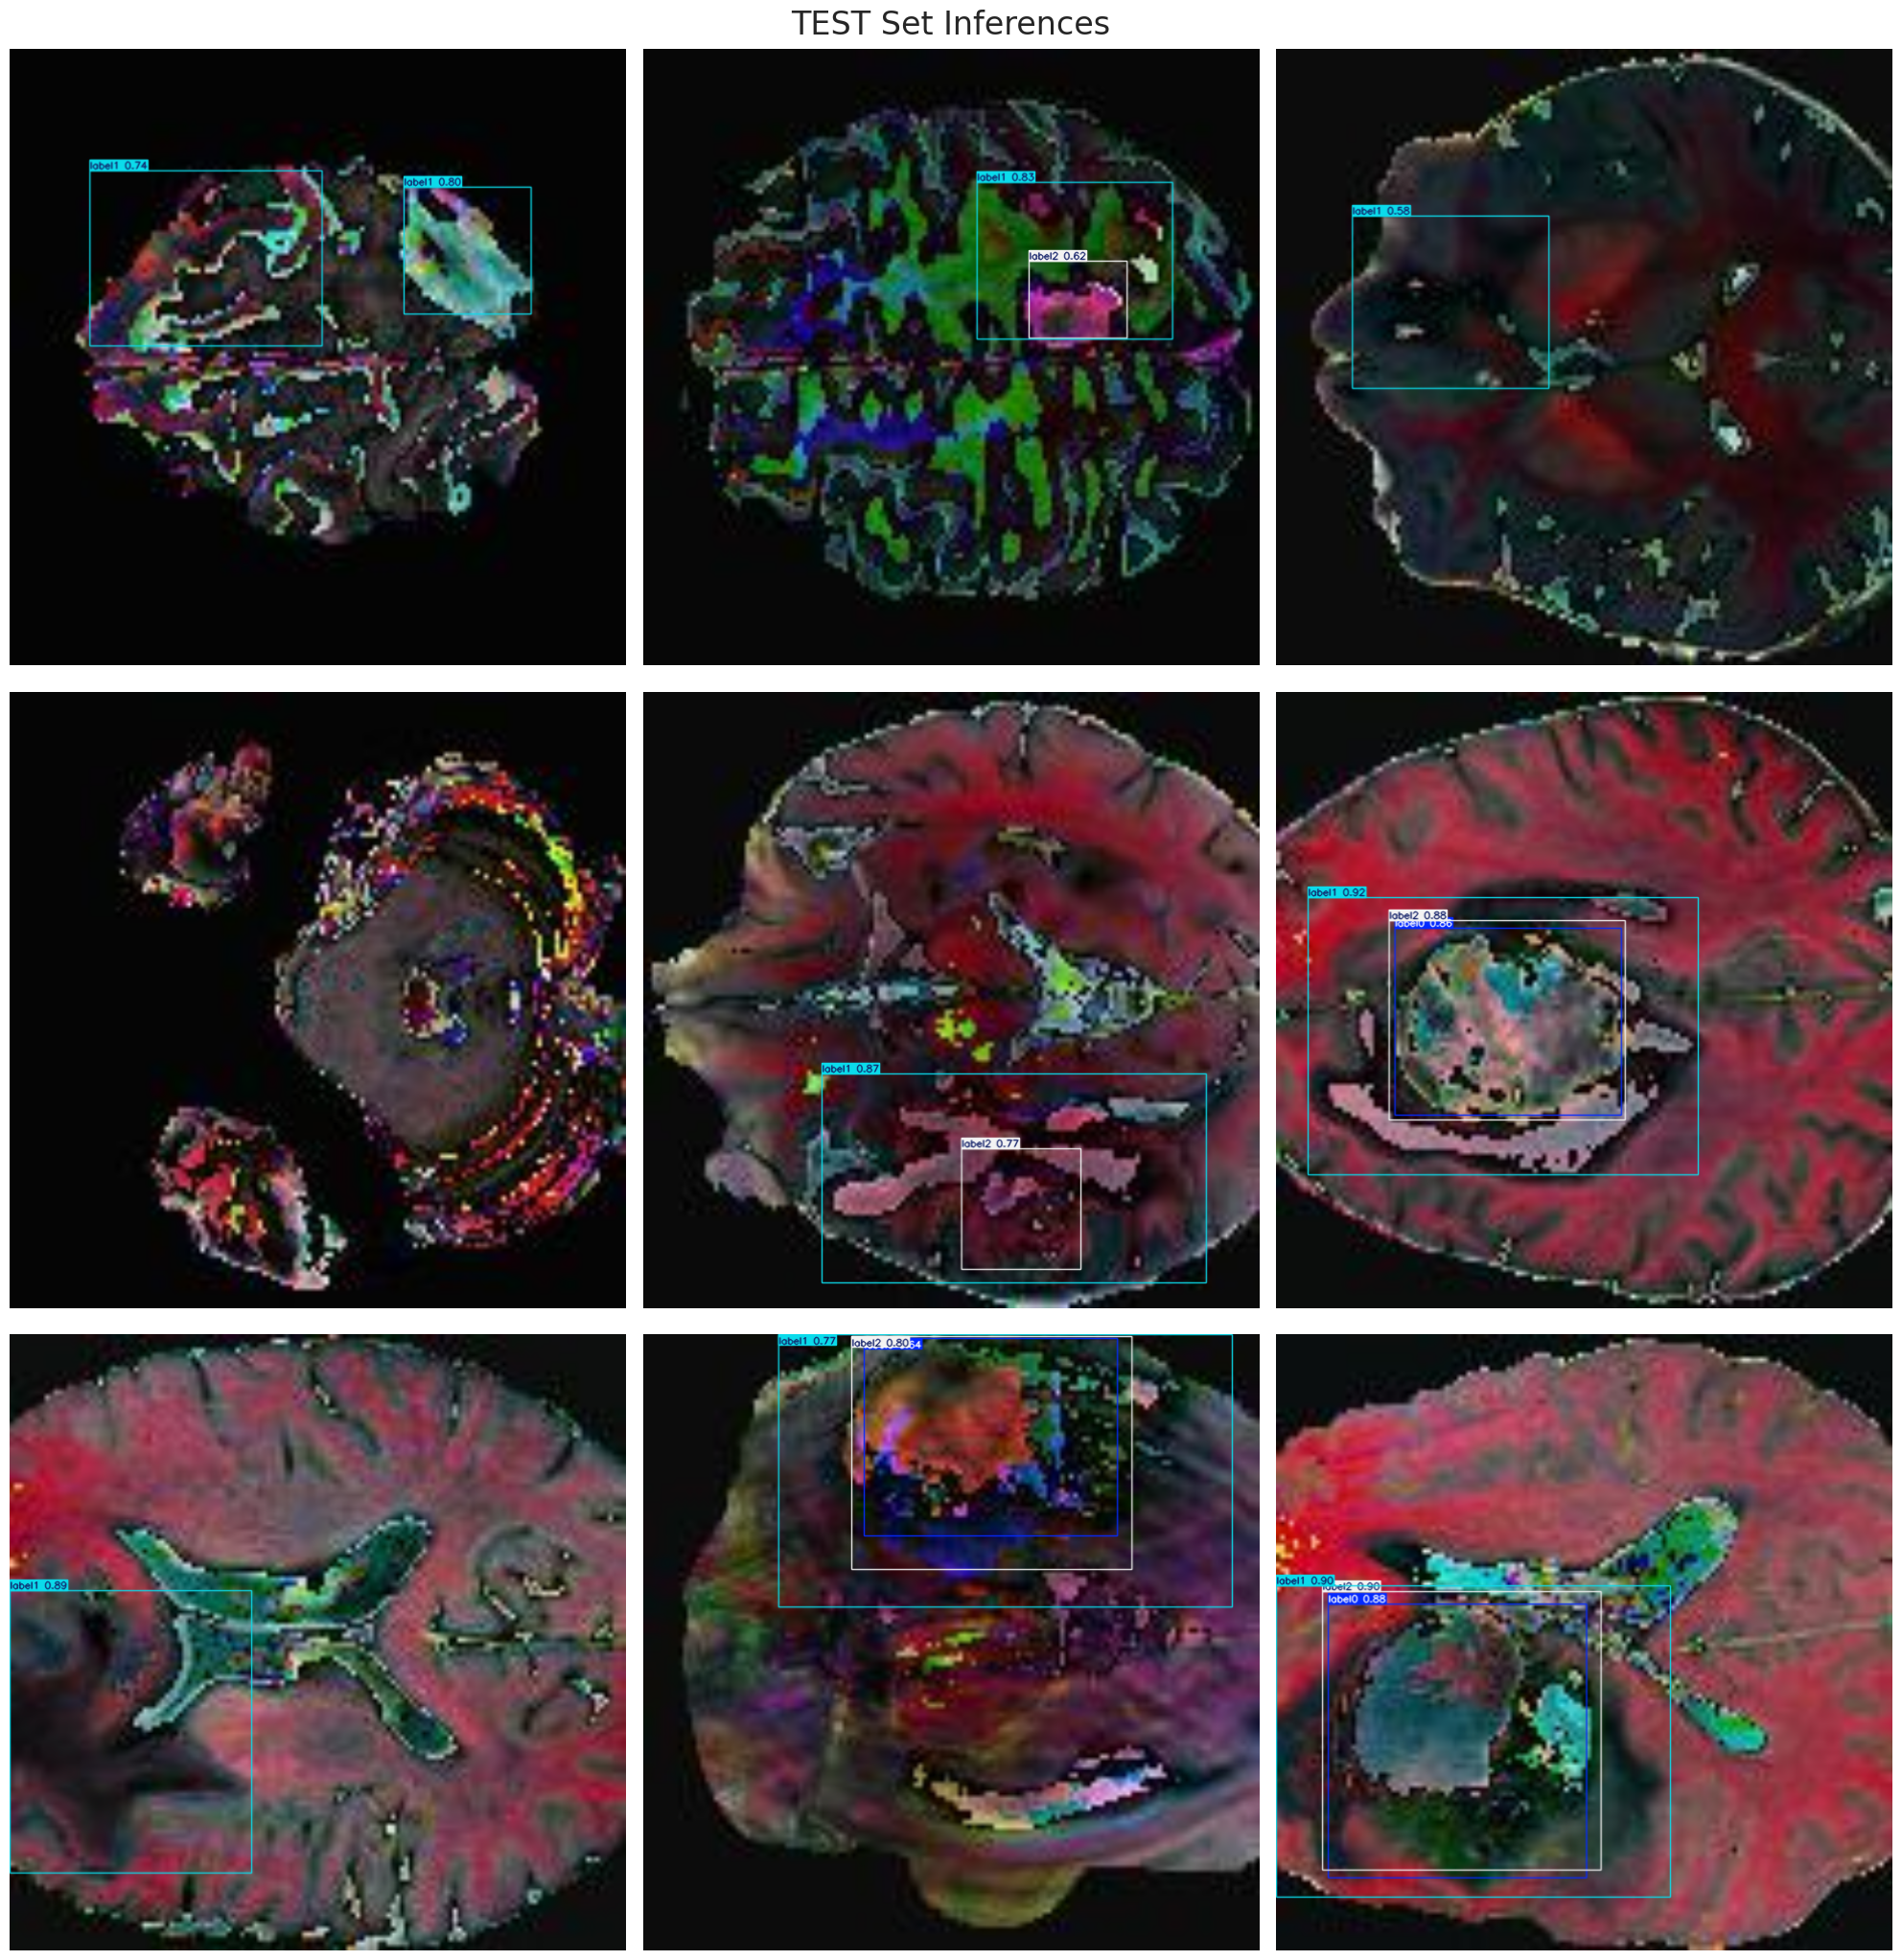

In [26]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = path
valid_images_path = os.path.join(dataset_path, 'TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/images')

# Load the best model
best_model = YOLO('/content/Brain_Tumor_Detection/yolov8n_tumor/weights/best.pt')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('TEST Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()